In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Pauli, SparsePauliOp
from qiskit.primitives import StatevectorEstimator, StatevectorSampler
from qiskit.visualization import plot_histogram

import numpy as np
np.alltrue = np.all

# QSP signal loading & Designing QSVT circuit

In [2]:
phase_str_input = """0.785772127121113
-0.000425226972078656
0.000476461808984088
-0.000529414058214937
0.000581359183656461
-0.000634981799775448
0.000688038659967571
-0.000743409083150673
0.000798909581802633
-0.000857430821584228
0.000916792362536284
-0.000979895746957432
0.00104458496363608
-0.00111380140558094
0.00118544516364086
-0.00126253088683332
0.00134305049244090
-0.00143013114457892
0.00152190092498953
-0.00162165075819057
0.00172770522741767
-0.00184359111765438
0.00196791672443003
-0.00210455128822130
0.00225251834180526
-0.00241619332269503
0.00259522065420298
-0.00279474257487214
0.00301535769915258
-0.00326340548755474
0.00354100033060951
-0.00385641971450536
0.00421428263256035
-0.00462614140881001
0.00510095205622573
-0.00565609151287366
0.00630845942749262
-0.00708645103933205
0.00802253693719754
-0.00916757500861107
0.0105871862658025
-0.0123823922003407
0.0146968241541342
-0.0177564127700781
0.0219108464822945
-0.0277353328777014
0.0361813550452377
-0.0488450708608460
0.0682274774954872
-0.0972753892058450
0.134998009697666
-0.162161066565843
0.134998009697666
-0.0972753892058450
0.0682274774954872
-0.0488450708608460
0.0361813550452377
-0.0277353328777014
0.0219108464822945
-0.0177564127700781
0.0146968241541342
-0.0123823922003407
0.0105871862658025
-0.00916757500861107
0.00802253693719754
-0.00708645103933205
0.00630845942749262
-0.00565609151287366
0.00510095205622573
-0.00462614140881001
0.00421428263256035
-0.00385641971450536
0.00354100033060951
-0.00326340548755474
0.00301535769915258
-0.00279474257487214
0.00259522065420298
-0.00241619332269503
0.00225251834180526
-0.00210455128822130
0.00196791672443003
-0.00184359111765438
0.00172770522741767
-0.00162165075819057
0.00152190092498953
-0.00143013114457892
0.00134305049244090
-0.00126253088683332
0.00118544516364086
-0.00111380140558094
0.00104458496363608
-0.000979895746957432
0.000916792362536284
-0.000857430821584228
0.000798909581802633
-0.000743409083150673
0.000688038659967571
-0.000634981799775448
0.000581359183656461
-0.000529414058214937
0.000476461808984088
-0.000425226972078656
0.785772127121113"""

In [3]:
phase_str_input = """0.779253322107751
0.00714561969293278
-0.00829084440475801
0.00966088557553418
-0.0112600606353680
0.0131971924572673
-0.0155141151680239
0.0183682131089700
-0.0218620542165499
0.0262232439958222
-0.0316205309084985
0.0383038462441232
-0.0463260959417788
0.0554980716881941
-0.0648426314382291
0.0724205822936245
-0.0754696656894781
0.0724205822936245
-0.0648426314382291
0.0554980716881941
-0.0463260959417788
0.0383038462441232
-0.0316205309084985
0.0262232439958222
-0.0218620542165499
0.0183682131089700
-0.0155141151680239
0.0131971924572673
-0.0112600606353680
0.00966088557553418
-0.00829084440475801
0.00714561969293278
0.779253322107751"""

In [4]:
phase_list = np.array([float(line.strip()) for line in phase_str_input.strip().splitlines() if line.strip()])

print(phase_list)
print(f"총 {len(phase_list)}개 숫자")

[ 0.77925332  0.00714562 -0.00829084  0.00966089 -0.01126006  0.01319719
 -0.01551412  0.01836821 -0.02186205  0.02622324 -0.03162053  0.03830385
 -0.0463261   0.05549807 -0.06484263  0.07242058 -0.07546967  0.07242058
 -0.06484263  0.05549807 -0.0463261   0.03830385 -0.03162053  0.02622324
 -0.02186205  0.01836821 -0.01551412  0.01319719 -0.01126006  0.00966089
 -0.00829084  0.00714562  0.77925332]
총 33개 숫자


In [5]:
def wx_to_reflection_angle(phases):
    """Change QSP angle from W(x) version to R(x) version

    Args:
        phases (_type_): QSP angles for W(x) QSP

    Returns:
        _type_: R(x) QSP angles
    """
    
    d = len(phases) - 1
    
    result = [0 for i in range(d)]
    result[0] = phases[0] + phases[d] + (d-1)*(np.pi/2)
    for i in range(1, d):
        result[i] = phases[i] - np.pi/2
    return result

phase_list = wx_to_reflection_angle(phase_list)

# 결과 출력
print(phase_list)
print(f"총 {len(phase_list)}개 숫자")

[np.float64(50.2531927748573), np.float64(-1.5636507071019639), np.float64(-1.5790871711996546), np.float64(-1.5611354412193623), np.float64(-1.5820563874302647), np.float64(-1.5575991343376292), np.float64(-1.5863104419629204), np.float64(-1.5524281136859266), np.float64(-1.5926583810114465), np.float64(-1.5445730827990745), np.float64(-1.602416857703395), np.float64(-1.5324924805507734), np.float64(-1.6171224227366754), np.float64(-1.5152982551067025), np.float64(-1.6356389582331257), np.float64(-1.498375744501272), np.float64(-1.6462659924843748), np.float64(-1.498375744501272), np.float64(-1.6356389582331257), np.float64(-1.5152982551067025), np.float64(-1.6171224227366754), np.float64(-1.5324924805507734), np.float64(-1.602416857703395), np.float64(-1.5445730827990745), np.float64(-1.5926583810114465), np.float64(-1.5524281136859266), np.float64(-1.5863104419629204), np.float64(-1.5575991343376292), np.float64(-1.5820563874302647), np.float64(-1.5611354412193623), np.float64(-1.57

In [6]:
from qiskit.circuit.library import XGate

def real_QSVT(QSVT_m: int, phases, U_A: QuantumCircuit) -> QuantumCircuit:

    qc = QuantumCircuit(1 + U_A.num_qubits) # Create 1 + # of qubits for Block encoding. We need one more ancilla qubits to make the real polynomial
    
    c_pi_not_gate = QuantumCircuit(QSVT_m + 1)
    c_pi_not_gate.compose(XGate().control(QSVT_m, ctrl_state='0'*QSVT_m), qubits=[i for i in range(1, QSVT_m+1)]+[0], inplace=True)
    
    qc.h(0) # To make real polynomial
    
    qc.h(range(QSVT_m+1, 1+U_A.num_qubits))
    
    d = len(phases)
    for j in range(d//2):
        qc.compose(U_A, qubits=[i for i in range(1, 1 + U_A.num_qubits)], inplace=True)
        
        qc.compose(c_pi_not_gate, qubits=[i for i in range(0, QSVT_m+1)], inplace=True)
        qc.rz(2*phases[-1-2*j], 0)
        qc.compose(c_pi_not_gate, qubits=[i for i in range(0, QSVT_m+1)], inplace=True)
        
        qc.compose(U_A.inverse(), qubits=[i for i in range(1, 1 + U_A.num_qubits)], inplace=True)
        
        qc.compose(c_pi_not_gate, qubits=[i for i in range(0, QSVT_m+1)], inplace=True)
        qc.rz(2*phases[-2-2*j], 0)
        qc.compose(c_pi_not_gate, qubits=[i for i in range(0, QSVT_m+1)], inplace=True)
        
    if d%2 == 1: # if d is odd
        qc.compose(U_A, qubits=[i for i in range(1, 1 + U_A.num_qubits)], inplace=True)
        
        qc.compose(c_pi_not_gate, qubits=[i for i in range(0, QSVT_m+1)], inplace=True)
        qc.rz(2*phases[0], 0)
        qc.compose(c_pi_not_gate, qubits=[i for i in range(0, QSVT_m+1)], inplace=True)


    qc.h(0) # To make real polynomial
    return qc

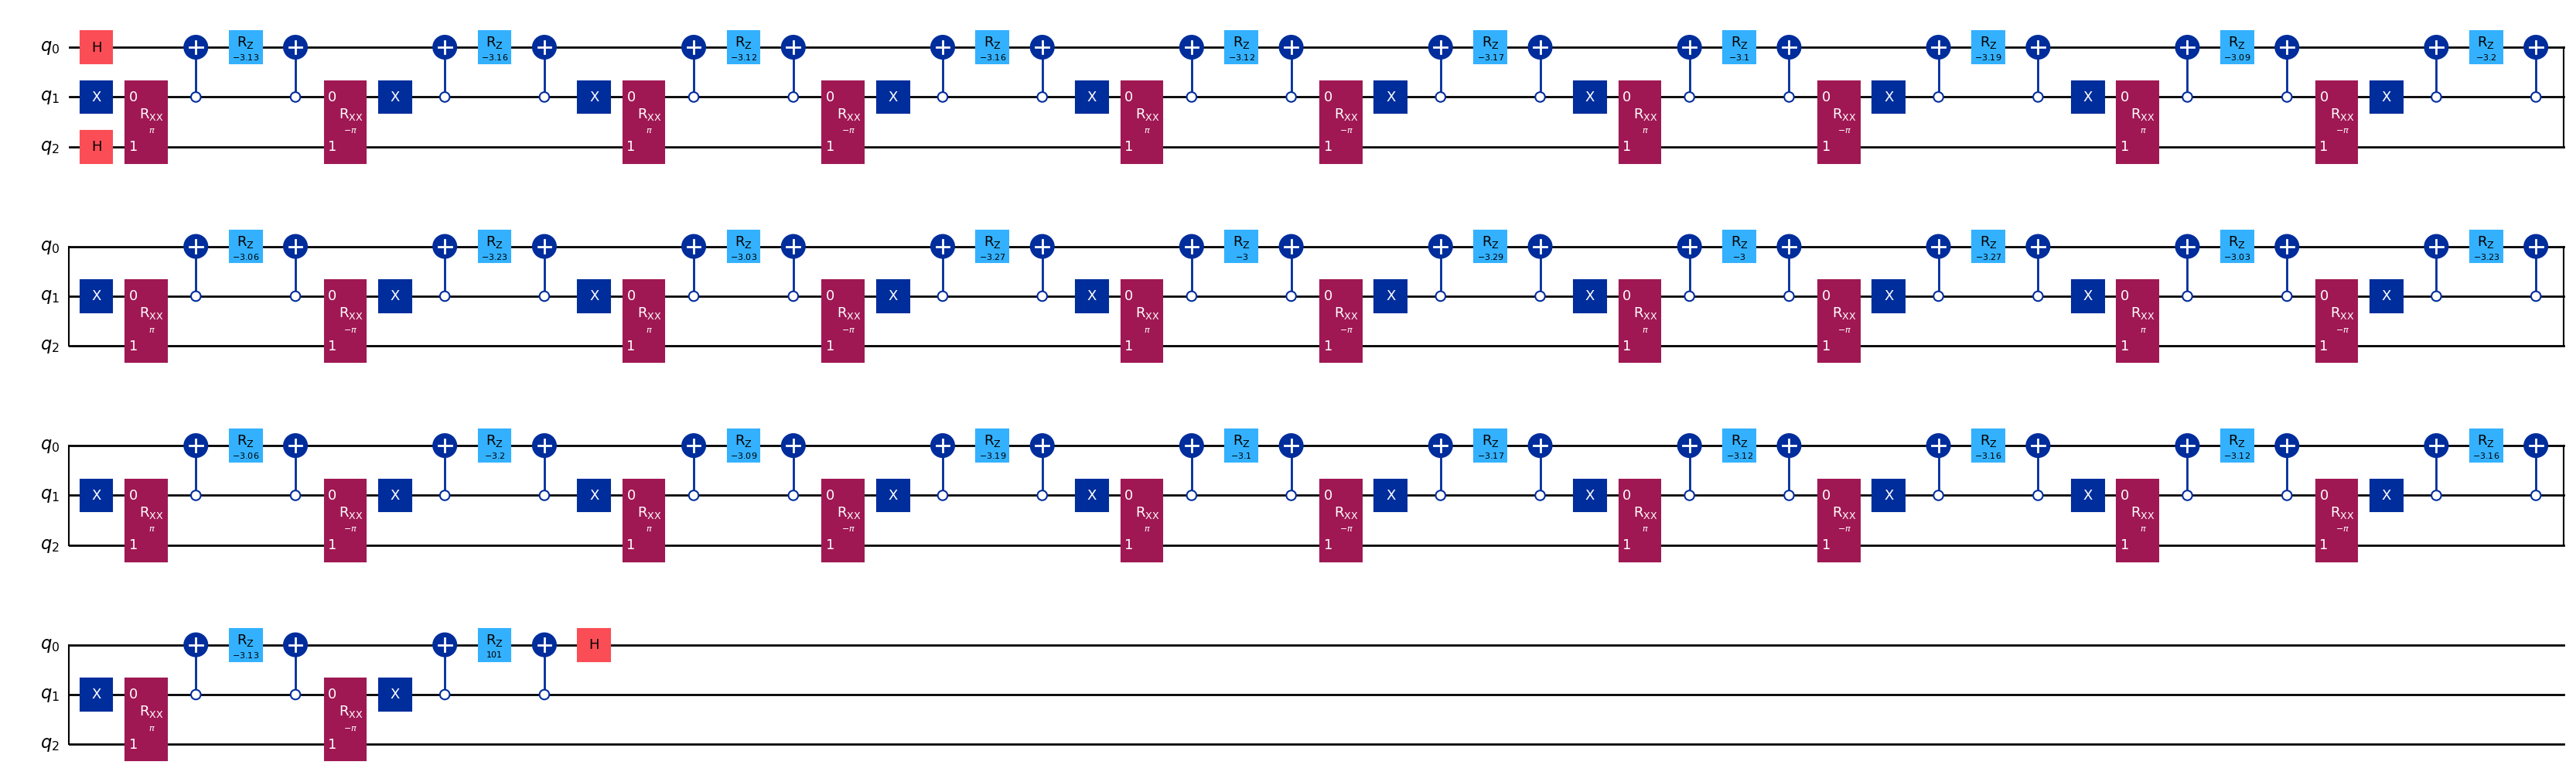

In [7]:
# Example

unitary_embedding_qc = QuantumCircuit(2)
unitary_embedding_qc.x(0)
unitary_embedding_qc.rxx(np.pi, 0, 1)

QSVT_qc = real_QSVT(1, phase_list, unitary_embedding_qc)
QSVT_qc.draw('mpl', fold=50)

# Max cut simulation을 위한 hamiltonian 제작

In [8]:
import networkx as nx

def build_maxcut_hamiltonian(graph: nx.Graph) -> SparsePauliOp:
    """
    Build the MaxCut Hamiltonian for the given graph H = (|E|/2)*I - (1/2)*Σ_{(i,j)∈E}(Z_i Z_j)
    """
    num_qubits = len(graph.nodes)
    edges = list(graph.edges())
    num_edges = len(edges)

    pauli_terms = ["I"*num_qubits] # start with identity
    coeffs = [-num_edges / 2]

    for (u, v) in edges: # for each edge, add -(1/2)*Z_i Z_j
        z_term = ["I"] * num_qubits
        z_term[u] = "Z"
        z_term[v] = "Z"
        pauli_terms.append("".join(z_term))
        coeffs.append(0.5)

    return SparsePauliOp.from_list(list(zip(pauli_terms, coeffs)))

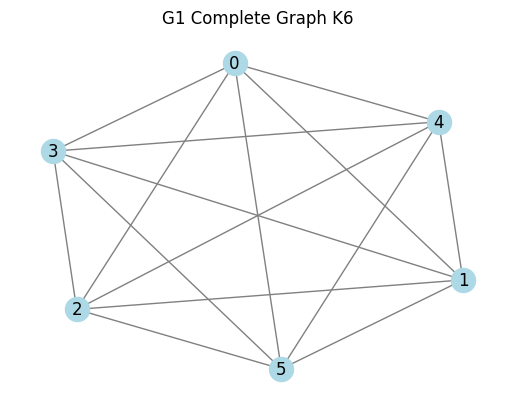

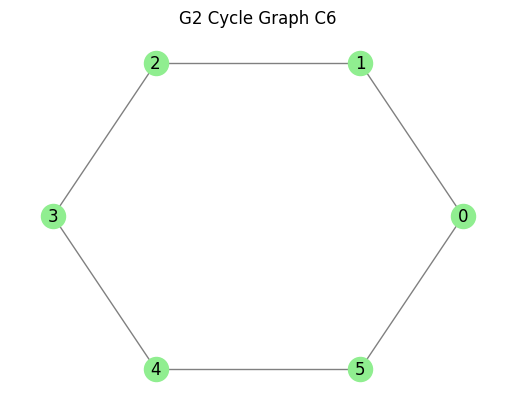

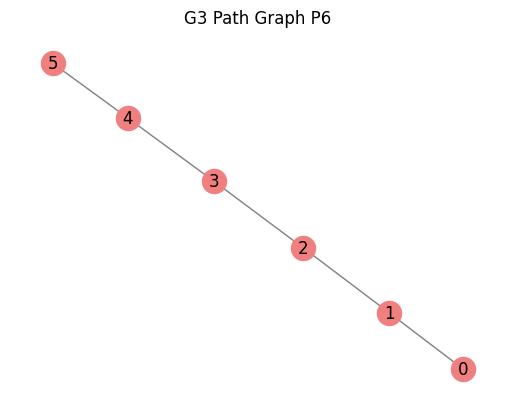

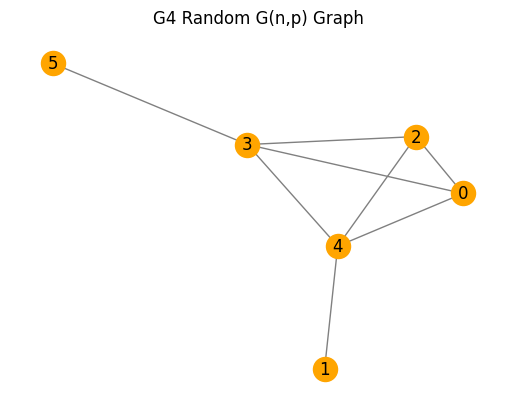

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def complete_graph_k6():
    G = nx.complete_graph(6)
    pos = nx.spring_layout(G)
    fig, ax = plt.subplots() 
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='lightblue', edge_color='gray')
    ax.set_title("G1 Complete Graph K6")
    plt.show()
    return G

def cycle_graph_c6():
    G = nx.cycle_graph(6)
    pos = nx.circular_layout(G)
    fig, ax = plt.subplots()
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='lightgreen', edge_color='gray')
    ax.set_title("G2 Cycle Graph C6")
    plt.show()
    return G

def path_graph_p6():
    G = nx.path_graph(6)
    pos = nx.spring_layout(G)  # 또는 nx.shell_layout(G), nx.circular_layout(G)
    fig, ax = plt.subplots()
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='lightcoral', edge_color='gray')
    ax.set_title("G3 Path Graph P6")
    plt.show()
    return G

def random_graph_gnp(n=6, p=0.4, seed=42):
    G = nx.erdos_renyi_graph(n, p, seed=seed)
    pos = nx.spring_layout(G)
    fig, ax = plt.subplots()
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='orange', edge_color='gray')
    ax.set_title("G4 Random G(n,p) Graph")
    plt.show()
    return G

G1 = complete_graph_k6()
G2 = cycle_graph_c6()
G3 = path_graph_p6()
G4 = random_graph_gnp()

# QSVT 를 위한 block encoding: LCU 이용

In [10]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import XGate, YGate, ZGate
from qiskit.quantum_info import SparsePauliOp
from math import ceil, log2

def lcu_block_encoding(operator: SparsePauliOp):
    pauli_labels = operator.paulis.to_labels()
    coeffs = operator.coeffs.real

    filtered_pauli_labels = []
    filtered_coeffs = []
    for label, coeff in zip(pauli_labels, coeffs):
        if not np.isclose(coeff, 0):
            filtered_pauli_labels.append(label)
            filtered_coeffs.append(coeff)
    
    num_terms = len(filtered_coeffs)
    num_qubits = operator.num_qubits

    if num_terms == 0:
        raise ValueError("Operator has no terms with non-zero coefficients.")
    
    lam = np.sum(np.abs(filtered_coeffs))
    ancilla_bits = ceil(log2(num_terms)) if num_terms > 1 else 0 
    
    if ancilla_bits > 0:
        anc = QuantumRegister(ancilla_bits, name='a')
        data = QuantumRegister(num_qubits, name='q')
        circuit = QuantumCircuit(anc, data)
        ancilla_qubits_list = anc[:]
    else:
        data = QuantumRegister(num_qubits, name='q')
        circuit = QuantumCircuit(data)
        ancilla_qubits_list = []

    if ancilla_bits > 0:
        prepare_vector = np.zeros(2**ancilla_bits, dtype=complex)
        normalized_amplitudes = np.sqrt(np.abs(filtered_coeffs) / lam)
        for i in range(num_terms):
            prepare_vector[i] = normalized_amplitudes[i]
            if filtered_coeffs[i] < 0:
                prepare_vector[i] *= -1
        
        prepare_circuit = QuantumCircuit(ancilla_bits, name='PREPARE')
        prepare_circuit.prepare_state(prepare_vector, range(ancilla_bits))
        
        prepare_gate = prepare_circuit.to_gate()
        
        circuit.append(prepare_gate, anc)
        circuit.barrier()

    for idx, pauli_label in enumerate(filtered_pauli_labels):
        ctrl_state = format(idx, f'0{ancilla_bits}b') if ancilla_bits > 0 else None

        for qubit_idx, p in enumerate(reversed(pauli_label)):
            if p == 'I':
                continue

            if p == 'X':
                base_gate = XGate()
            elif p == 'Y':
                base_gate = YGate()
            elif p == 'Z':
                base_gate = ZGate()
            else:
                raise ValueError(f"알 수 없는 파울리 연산자: {p}")

            if ancilla_bits > 0:
                controlled_gate = base_gate.control(num_ctrl_qubits=ancilla_bits, ctrl_state=ctrl_state)
                circuit.append(controlled_gate, ancilla_qubits_list + [data[qubit_idx]])
            else:
                circuit.append(base_gate, [data[qubit_idx]])
    
    circuit.barrier()

    if ancilla_bits > 0:
        circuit.append(prepare_gate.inverse(), anc)

    return circuit, lam, ancilla_bits


In [11]:
qc, lam, ancilla_bits = lcu_block_encoding(build_maxcut_hamiltonian(G3))

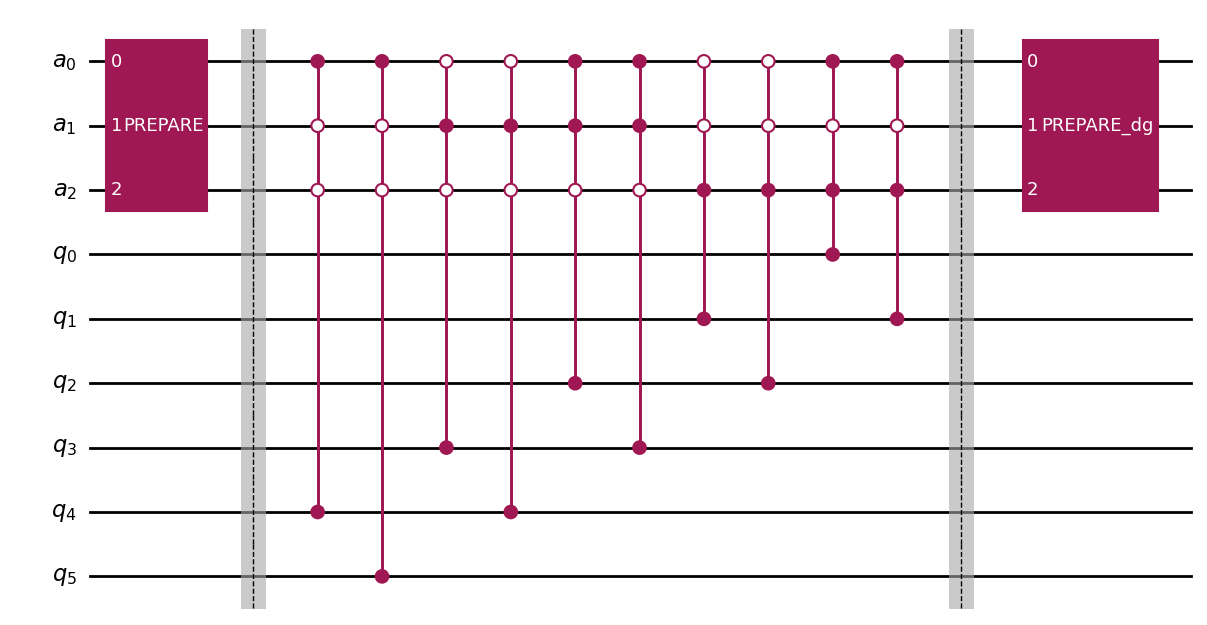

In [12]:
qc.draw('mpl')

# QSVT 구현

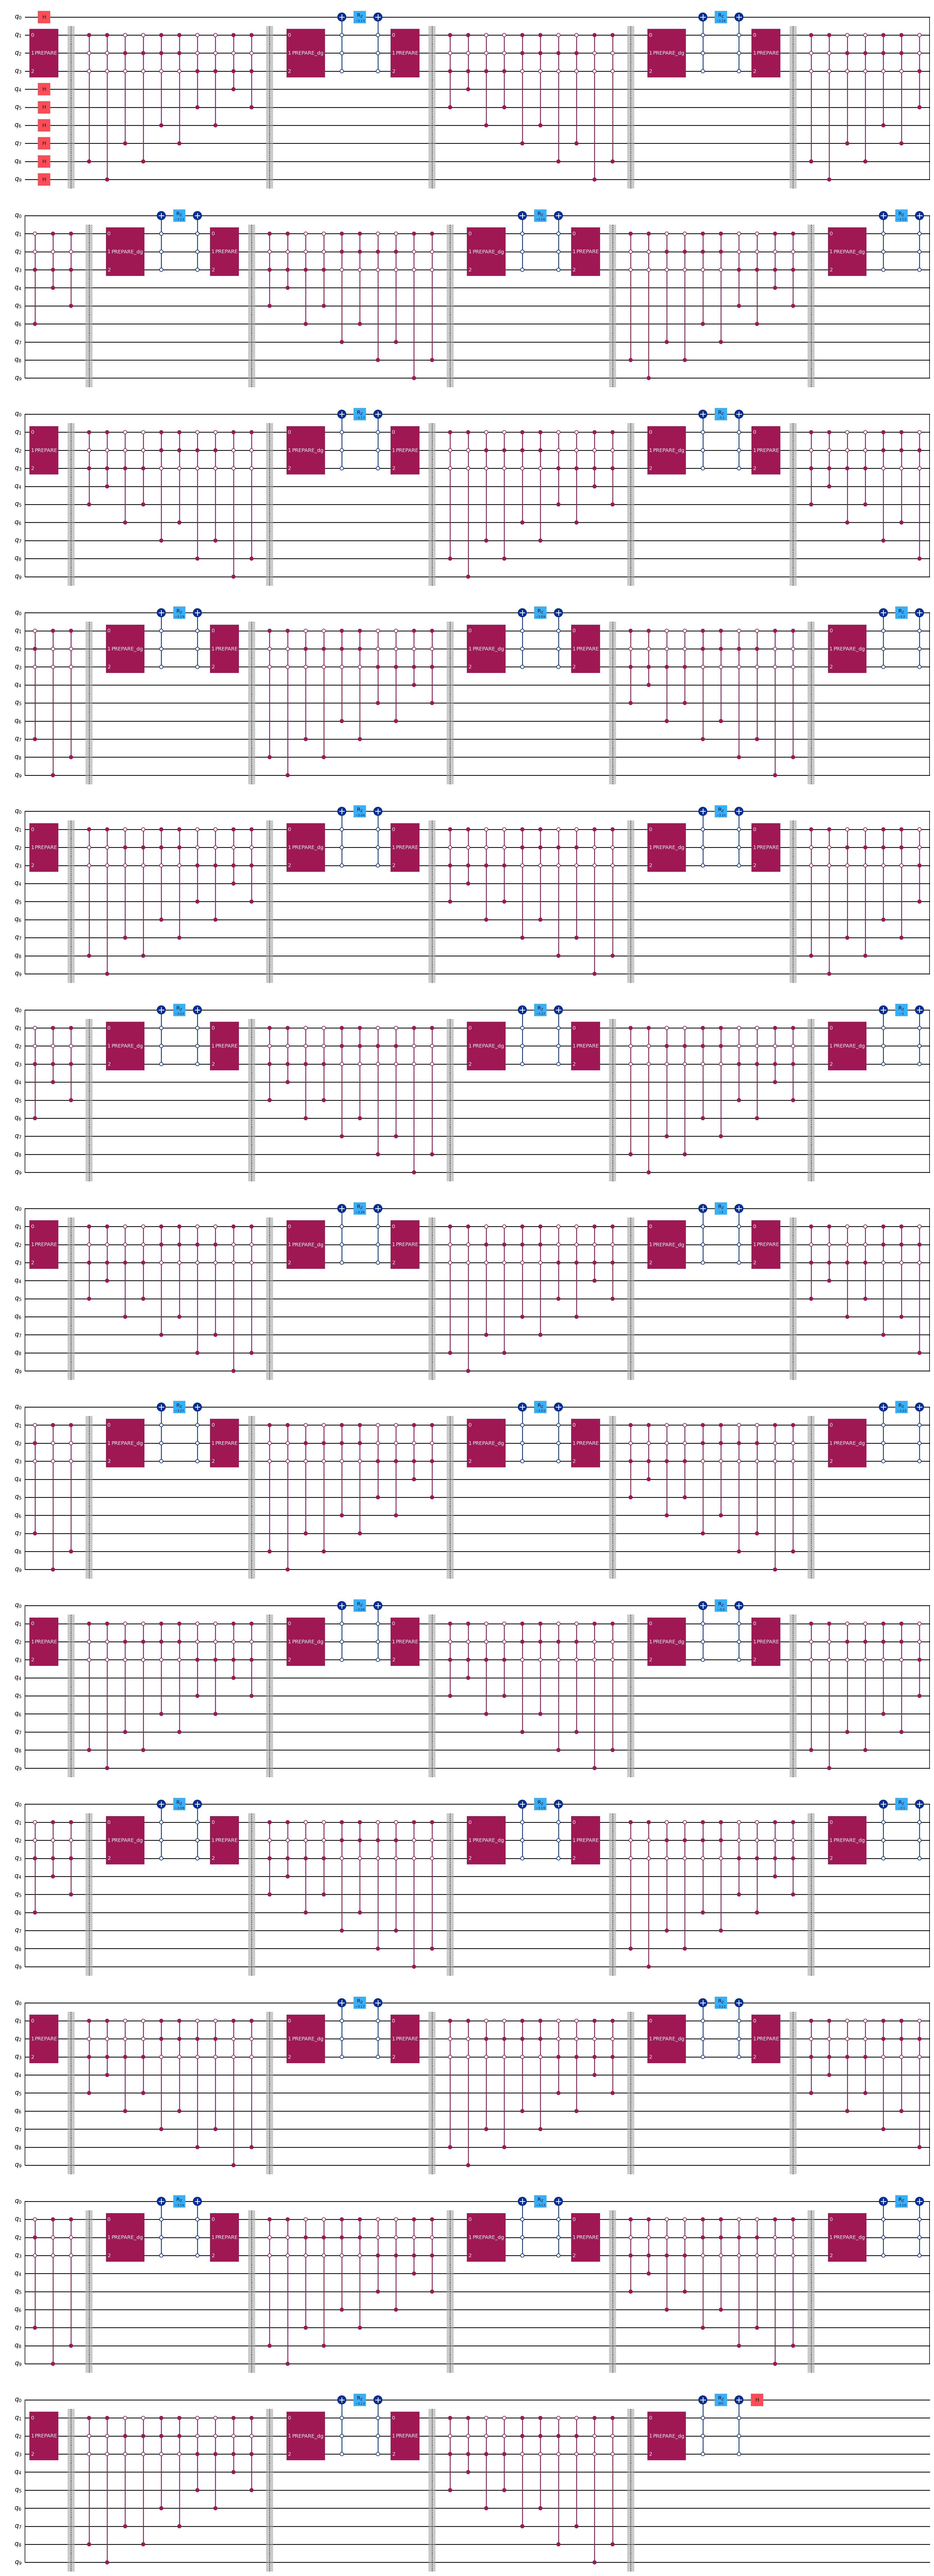

In [13]:
QSVT_qc = real_QSVT(ancilla_bits, phase_list, qc)
QSVT_qc.draw('mpl', fold=50)

In [14]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Pauli, SparsePauliOp
from qiskit.primitives import StatevectorEstimator, StatevectorSampler
from qiskit.visualization import plot_histogram

import numpy as np

{'1010100000': 10708, '0101010000': 10489, '1011010000': 339, '1010010000': 309, '0110100000': 306, '0101100000': 346, '1101010000': 260, '1010110000': 308, '0101000000': 285, '0100100000': 294, '0010110000': 9, '0010100000': 299, '0100110000': 12, '0011010000': 13, '1001010000': 317, '0111010000': 11, '1010000000': 7, '1001000000': 13, '1100100000': 7, '1011100000': 10, '0100010000': 16, '1110100000': 17, '1011000000': 13, '1101110000': 3, '0010010000': 17, '0010000000': 2, '0100000000': 1, '1101000000': 10, '0111100000': 1, '0110010000': 14, '0101110000': 21, '0110000000': 1, '0011100000': 4, '0111000000': 2, '0110110000': 9, '1000100000': 13, '1101100000': 14, '1001100000': 12, '1001110000': 2, '1000010000': 4, '0001010000': 11, '1100110000': 2, '0000010000': 1, '0011000000': 1, '0000100000': 1, '0001000000': 3, '1111110000': 1, '0000000000': 1, '0111110000': 1, '1000000000': 1, '1111010000': 1}


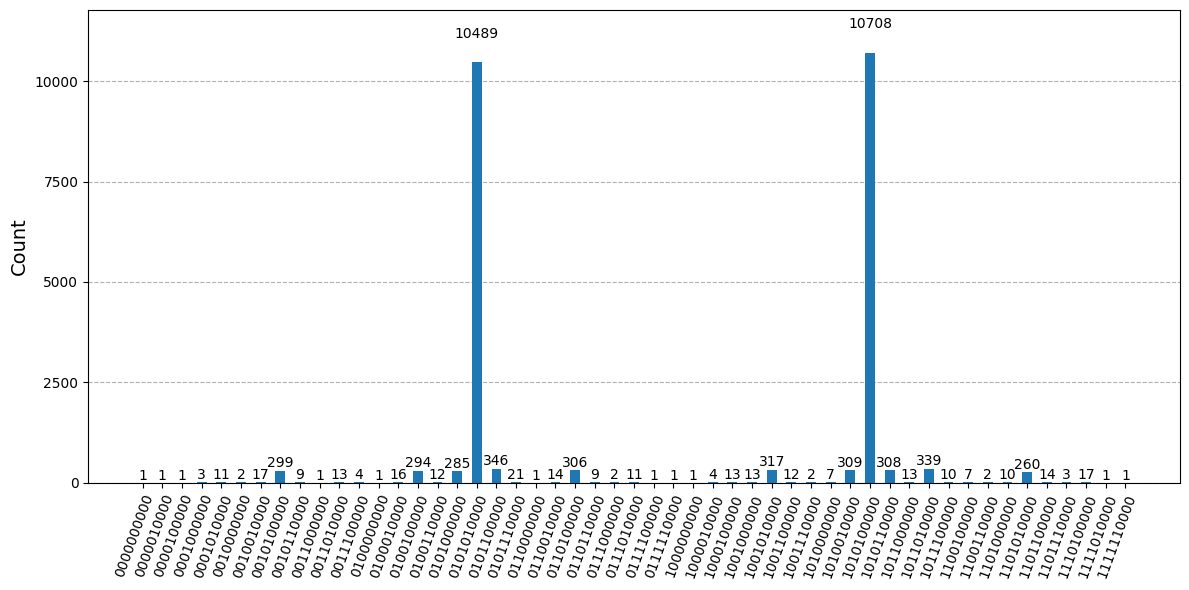

In [15]:
from qiskit.visualization import plot_histogram

N=ancilla_bits
QSVT_qc.measure_all()
sampler = StatevectorSampler()

pub = (QSVT_qc)
job = sampler.run([pub], shots=1000000)

result = job.result()[0]

def filter_dict_by_trailing_zeros(input_dict, N):
    suffix = '0' * (N + 1)
    filtered_dict = {k: v for k, v in input_dict.items() if k.endswith(suffix)}
    return filtered_dict

count_result = result.data.meas.get_counts()
print(filter_dict_by_trailing_zeros(count_result, N))
plot_histogram(filter_dict_by_trailing_zeros(count_result, N), figsize=(12,6))

# QSVT + QPE

C:\Users\82108\AppData\Local\Temp\ipykernel_33420\2466925138.py:28: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.compose(QFT(num_ancilla, do_swaps=True).inverse(), range(num_ancilla), inplace=True)


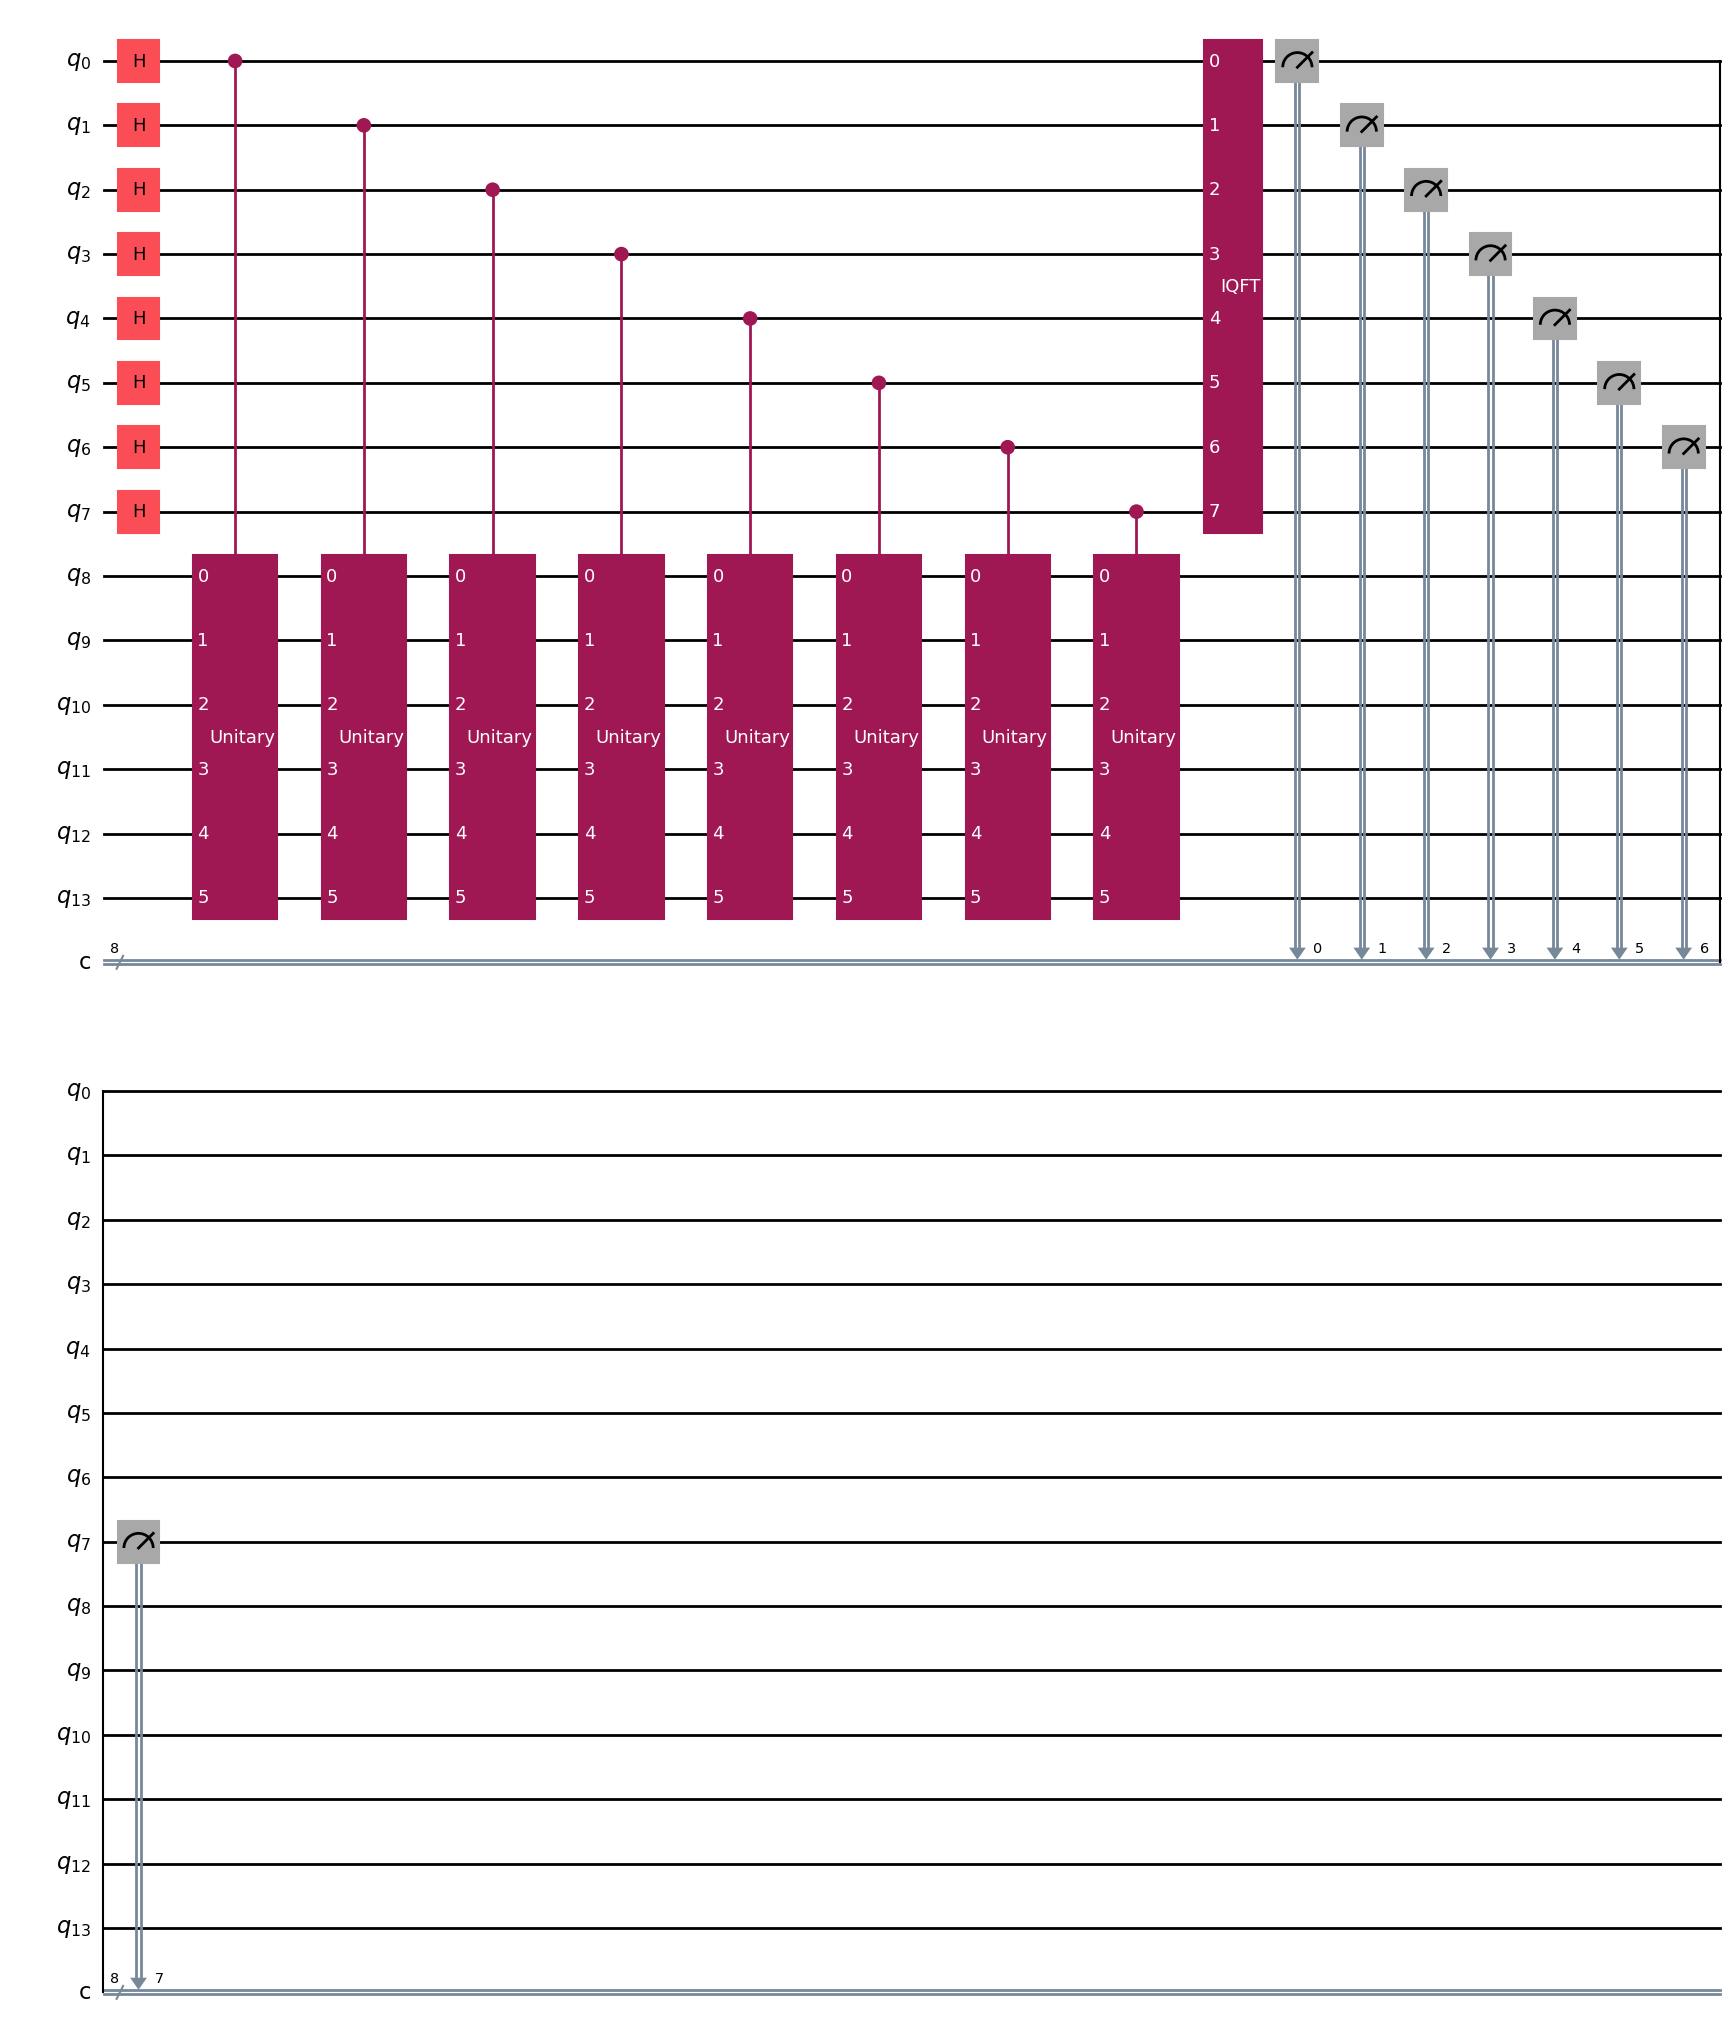

In [16]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import expm
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator, Aer
from qiskit.circuit.library import QFT, UnitaryGate
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython import display
import pandas as pd
from typing import List
from qiskit.circuit import ParameterVector
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator

from qiskit.circuit.library import UnitaryGate, QFT
def create_qpe_circuit(num_ancilla: int, U_gate: UnitaryGate, state_prep: QuantumCircuit) -> QuantumCircuit:
    n_target = state_prep.num_qubits
    U_mat = U_gate.to_matrix()
    qc = QuantumCircuit(num_ancilla + n_target, num_ancilla)
    qc.h(range(num_ancilla))
    qc.compose(state_prep, qubits=range(num_ancilla, num_ancilla+n_target), inplace=True)
    for j in range(num_ancilla):
        mat_pow = np.linalg.matrix_power(U_mat, 2**j)
        qc.append(UnitaryGate(mat_pow).control(), [j] + list(range(num_ancilla, num_ancilla+n_target)))
    qc.compose(QFT(num_ancilla, do_swaps=True).inverse(), range(num_ancilla), inplace=True)
    qc.measure(range(num_ancilla), range(num_ancilla))
    return qc

def bit_to_E(bs, t, T):
    phi = int(bs, 2) / 2**t
    if phi >= 0.5:
        phi -= 1.0
    return (2 * np.pi * phi) / T

def visualize_maxcut_solution(graph: nx.Graph, bitstring: str, title="Max-Cut Visualization"):
    color_map = ['lightcoral' if bit == '0' else 'lightblue' for bit in bitstring[::-1]]
    pos = nx.spring_layout(graph, seed=42)
    fig, ax = plt.subplots()
    nx.draw(graph, pos, ax=ax, with_labels=True, node_color=color_map, edge_color='gray')
    ax.set_title(f"{title}\nBitstring: {bitstring}")
    plt.show()

def run_qpe_on_graph(graph: nx.Graph, t: int = 8, shots: int = 4096):
    nq = graph.number_of_nodes()
    H = build_maxcut_hamiltonian(graph)
    
    H_mat = Operator(H).data
    E_bound = graph.number_of_edges()  # normalization
    T = np.pi / E_bound

    state_prep = QuantumCircuit(nq)

    U = expm(1j * T * H_mat)
    U_gate = UnitaryGate(U, label="e^{iTH}")

    qpe = create_qpe_circuit(t, U_gate, state_prep)
    
    return qpe, t, T

def visualize_qpe_eigenvector_maxcut(graph: nx.Graph, top_bitstring: str, t: int):
    H = build_maxcut_hamiltonian(graph)
    H_mat = Operator(H).data
    E_bound = graph.number_of_edges()
    T = np.pi / E_bound

    phi_hat = int(top_bitstring, 2) / 2**t
    if phi_hat >= 0.5:
        phi_hat -= 1
    E_hat = (2 * np.pi * phi_hat) / T
    print(f"\n[QPE Estimated Eigenvalue] E ≈ {E_hat:.5f}")

    eigvals, eigvecs = np.linalg.eigh(H_mat)
    idx_closest = np.argmin(np.abs(eigvals - E_hat))
    true_E = eigvals[idx_closest]
    v = eigvecs[:, idx_closest]
    print(f"[Closest True Eigenvalue] E = {true_E:.5f}")

    probs = np.abs(v) ** 2
    max_idx = np.argmax(probs)
    n_qubits = int(np.log2(len(H_mat)))
    measured_bitstring = f"{max_idx:0{n_qubits}b}"
    print(f"[Most Probable State in Eigenvector] |{measured_bitstring}⟩  with prob = {probs[max_idx]:.3f}")

    visualize_maxcut_solution(graph, measured_bitstring, title="QPE Inferred Max-Cut")


qpe_qc, qpe_precision_qubits_num, T = run_qpe_on_graph(G3, 8)
qpe_qc.draw('mpl')

In [17]:
from qiskit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(QSVT_qc.num_qubits+qpe_precision_qubits_num, name='q')
cr = ClassicalRegister(ancilla_bits+1+qpe_precision_qubits_num, name='c')
qc_QSVT_QPE = QuantumCircuit(qr, cr)

qc_QSVT_QPE.compose(real_QSVT(ancilla_bits, phase_list, qc), qubits=[i for i in range(QSVT_qc.num_qubits)], inplace=True)

qc_QSVT_QPE.measure([qr[i] for i in range(ancilla_bits+1)], [cr[i] for i in range(ancilla_bits+1)])

qc_QSVT_QPE.barrier()
qc_QSVT_QPE.compose(qpe_qc, qubits=[i for i in range(QSVT_qc.num_qubits, QSVT_qc.num_qubits+qpe_precision_qubits_num)]+[i for i in range(ancilla_bits+1, ancilla_bits+1+qpe_qc.num_qubits-qpe_precision_qubits_num)], clbits = [i for i in range(ancilla_bits+1,ancilla_bits+1+qpe_precision_qubits_num)], inplace=True)
qc_QSVT_QPE.draw(output="mpl", idle_wires=False, fold=100)

In [18]:
from qiskit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(QSVT_qc.num_qubits+qpe_precision_qubits_num, name='q')
cr = ClassicalRegister(ancilla_bits+1+qpe_precision_qubits_num, name='c')
qc_QSVT_QPE = QuantumCircuit(qr, cr)

qc_QSVT_QPE.compose(real_QSVT(ancilla_bits, phase_list, qc), qubits=[i for i in range(QSVT_qc.num_qubits)], inplace=True)

qc_QSVT_QPE.barrier()
qc_QSVT_QPE.compose(qpe_qc, qubits=[i for i in range(QSVT_qc.num_qubits, QSVT_qc.num_qubits+qpe_precision_qubits_num)]+[i for i in range(ancilla_bits+1, ancilla_bits+1+qpe_qc.num_qubits-qpe_precision_qubits_num)], clbits = [i for i in range(ancilla_bits+1,ancilla_bits+1+qpe_precision_qubits_num)], inplace=True)
qc_QSVT_QPE.measure([qr[i] for i in range(ancilla_bits+1)], [cr[i] for i in range(ancilla_bits+1)])
qc_QSVT_QPE.draw(output="mpl", idle_wires=False, fold=100)

In [19]:
print(ancilla_bits)

3


{'100000000000': 21309, '101100110000': 233, '100111010000': 31, '100110010000': 768, '100110100000': 1746, '100101010000': 13, '100101000000': 12, '100100000000': 2, '100110000000': 101, '101110110000': 2, '111001010000': 1, '101000000000': 9, '110011010000': 31, '101101000000': 11, '100110110000': 146, '101001000000': 4, '110011100000': 1, '000000000000': 2, '101101110000': 1, '100010100000': 3, '100101100000': 17, '100101110000': 35, '100111000000': 51, '100111110000': 10, '110011110000': 1, '100100100000': 3, '101000010000': 3, '011111000000': 1, '101110010000': 3, '101001110000': 4, '110011000000': 3, '100100110000': 6, '100111100000': 19, '111010000000': 1, '101101100000': 2, '100100010000': 3, '100011000000': 1, '111001100000': 2, '100011110000': 1, '101100100000': 3, '100011100000': 4, '101000100000': 7, '100010110000': 2, '101011110000': 1, '101100010000': 2, '101010100000': 1, '101100000000': 3, '101101010000': 5, '101000110000': 1, '011010000000': 1, '101001100000': 5, '1100

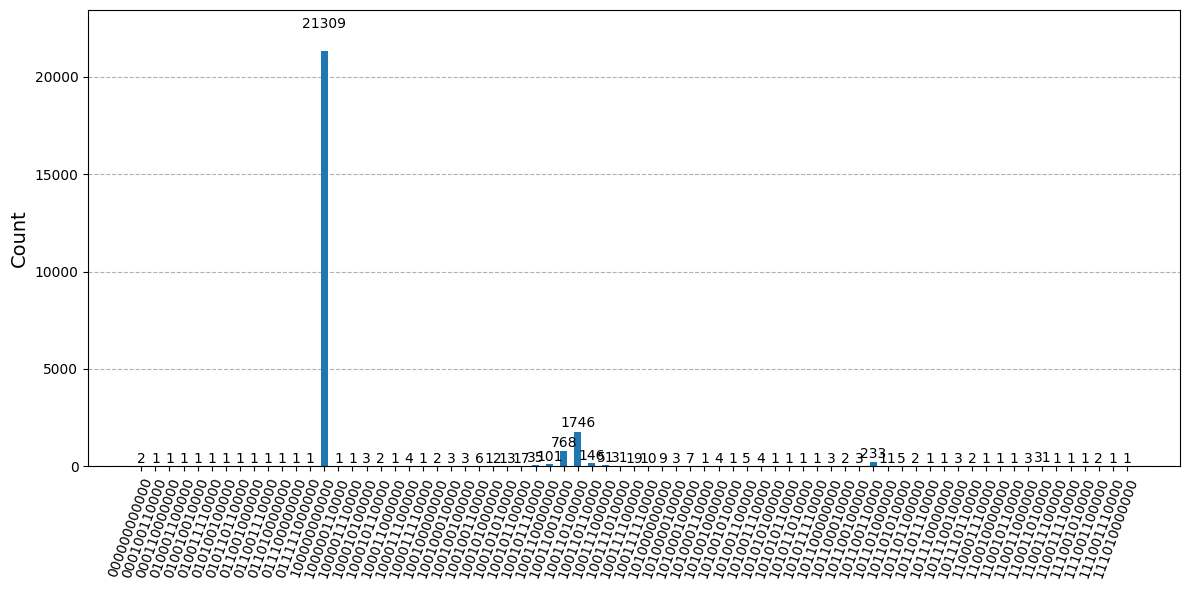

In [20]:
from qiskit.visualization import plot_histogram

N=ancilla_bits
sampler = StatevectorSampler()

pub = (qc_QSVT_QPE)
job = sampler.run([pub], shots=1000000)

result = job.result()[0]

def filter_dict_by_trailing_zeros(input_dict, N):
    suffix = '0' * (N+1)
    filtered_dict = {k: v for k, v in input_dict.items() if k.endswith(suffix)}
    return filtered_dict

count_result = result.data.c.get_counts()
final_result=filter_dict_by_trailing_zeros(count_result, N)
print(final_result)
plot_histogram(final_result, figsize=(12,6))

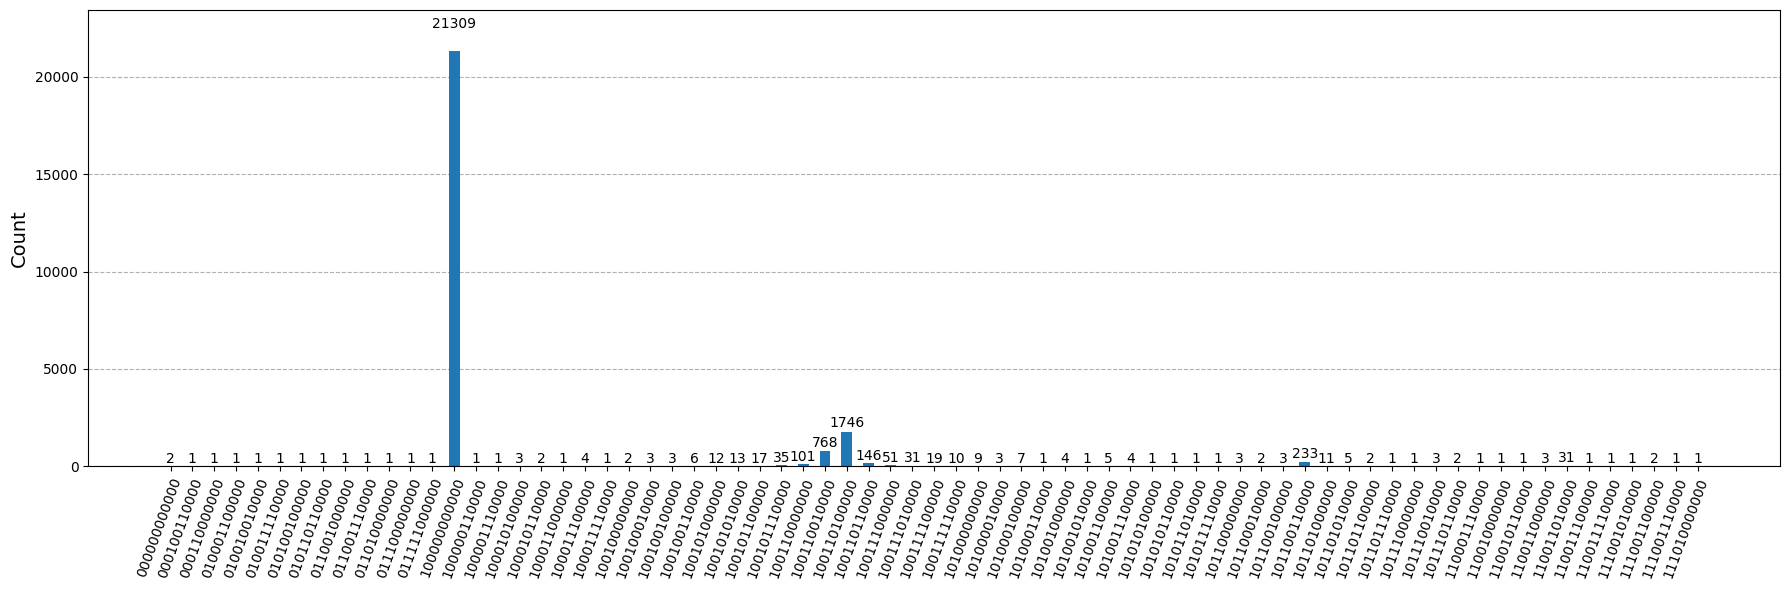

In [21]:
plot_histogram(final_result, figsize=(18, 6))

In [22]:
print("\n QSVT+QPE 결과 (Top-10) ")
for i, (bs, f) in enumerate(sorted(final_result.items(), key=lambda kv: kv[1], reverse=True)[:10], 1):
    print(f"{i}. bits {bs}  freq {f:4d}  E_QPE ≈ {bit_to_E(bs, len(bs), T):.3f}")


 QSVT+QPE 결과 (Top-10) 
1. bits 100000000000  freq 21309  E_QPE ≈ -5.000
2. bits 100110100000  freq 1746  E_QPE ≈ -3.984
3. bits 100110010000  freq  768  E_QPE ≈ -4.023
4. bits 101100110000  freq  233  E_QPE ≈ -3.008
5. bits 100110110000  freq  146  E_QPE ≈ -3.945
6. bits 100110000000  freq  101  E_QPE ≈ -4.062
7. bits 100111000000  freq   51  E_QPE ≈ -3.906
8. bits 100101110000  freq   35  E_QPE ≈ -4.102
9. bits 100111010000  freq   31  E_QPE ≈ -3.867
10. bits 110011010000  freq   31  E_QPE ≈ -1.992



[QPE Estimated Eigenvalue] E ≈ -5.00000
[Closest True Eigenvalue] E = -5.00000
[Most Probable State in Eigenvector] |010101⟩  with prob = 1.000


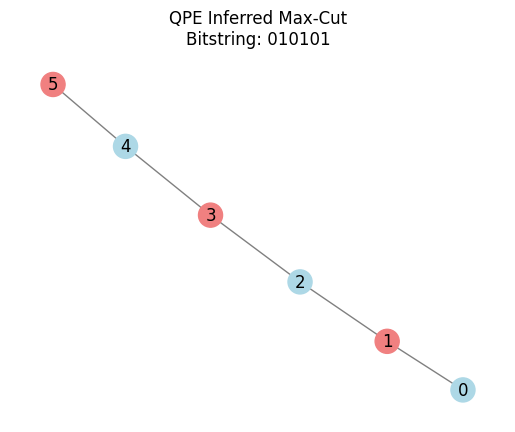

In [23]:
max_bitstring = max(final_result, key=final_result.get)
truncated_bitstring = max_bitstring[:-(ancilla_bits+1)]

visualize_qpe_eigenvector_maxcut(G3, truncated_bitstring, qpe_precision_qubits_num)